# Exercici 1

In [47]:
def is_toeplitz( mat ):
    
    import sympy as sp
    
    result = True # benefit of the doubt
    
    for idx_1 in range( mat.shape[ 0 ] - 1 ) :
        for idx_2 in range( mat.shape[ 1 ] - 1 ) :
            diff = mat[ idx_1, idx_2 ] - mat[ idx_1 + 1, idx_2 +1 ]
            if not( sp.simplify( diff ) == 0 ) :
                result = False # violation of the condition
                break
                
    return result

# --------------------------------------------------------------------------------

def is_hermitian( mat ):
    
    import sympy as sp
    
    result = True # benefit of the doubt
    
    for idx_1 in range( mat.shape[ 0 ] ) :
        for idx_2 in ( range( mat.shape[ 1 ] ) ) :
            if (idx_2 == idx_1): # no comprovar diagonal, (si al ex.2 entrem un complex al primer element no funcionarà mai)
                continue
            diff = mat[ idx_1, idx_2 ] - sp.conjugate( mat[ idx_2, idx_1 ] )
            if not( sp.simplify( diff ) == 0 ) :
                print(idx_1, idx_2)
                result = False # violation of the condition
                break

    return result

In [28]:
import sympy as sp
from collections.abc import Iterable

def unwrap(a: Iterable):
    """
    Desfà una llista de llistes de llistes... en una sola llista
    """
    new = []
    
    for i in a:
        new = new + (unwrap(i) if isinstance(i, Iterable) else [i])
    
    return new

def toeplitz_hermitians(vec, conversor) -> list: 
    """
    Crea una matriu toeplitz hemitania (però on tu li dius la forma d'implementar el conjugat)
    """
    new = [[i for i in vec]]
    reversed_vec = list(map(conversor, reversed(vec[1:])))
    for i in range(1, len(vec)):
        new.append([item for item in reversed_vec[-i:]] + vec[:-i])

    return sp.Matrix(new)

def compute_herm_toeplitz_matrix(vec):
    """Crea una matriu de toeplitz hermitania on la primera fila és el paràmtetre"""
    
    new = toeplitz_hermitians(vec, sp.conjugate)

    assert is_toeplitz(new), "Not toeplitz"
    assert is_hermitian(new), "Not hermitian"

    return new


In [31]:
def unit_test_toeplitz():
    
    import sympy as sp
    sp.init_printing()

    alpha = sp.symbols( 'alpha' )
    x = sp.symbols( 'x' )
    z = sp.symbols( 'z' )

    v = sp.Matrix( [ x + sp.conjugate( x ), sp.exp( alpha ), sp.sin( z ) ])

    mat = compute_herm_toeplitz_matrix( v )
    print(mat)
    test_1 = is_toeplitz( mat )
    test_2 = is_hermitian( mat )
    result = test_1 and test_2
    
    return result

In [32]:
unit_test_toeplitz()

Matrix([[x + conjugate(x), exp(alpha), sin(z)], [exp(conjugate(alpha)), x + conjugate(x), exp(alpha)], [sin(conjugate(z)), exp(conjugate(alpha)), x + conjugate(x)]])


True

# Exercici 2

In [5]:
def eigen_toepl_herm_complex(vec):
    mat = compute_herm_toeplitz_matrix(vec)
    
    eigen = [(values, vectors) for values*, vectors in mat.eigenvects()]
    
    
    
    

SyntaxError: invalid syntax (<ipython-input-5-2b89deee098d>, line 4)

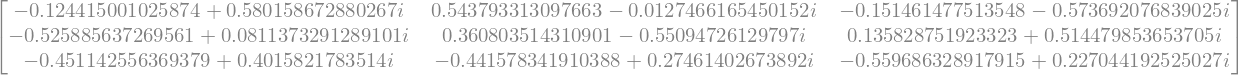

In [81]:
def eigen_herm_toeplitz_from_complex(v):
    mat = compute_herm_toeplitz_matrix(v)

    eigen = mat.eigenvects()

    values = [val for (val, times, *_) in eigen for _ in range(times)]
    vectors = [vecs for (*_, vecs) in eigen]
    
    mat_eigenvalues = sp.diag(*values)
    
    len_values = len(values)
    
    return sp.Matrix(mat_eigenvalues), sp.Matrix(vectors).reshape(len_values, len_values)



a, b = eigen_herm_toeplitz_from_complex([1+1j, 3-4j, 6+1j])    

b